Now for parcellations.  How do they work.  Begin with 2d map metaphor

In [48]:
#Path to the repo for this project
repoPath='/Users/plab/Documents/ipynb/'

import nibabel as nib
atlasPath='/Users/plab/Documents/JupyerData/proj-5941a225f876b000210c11e5/sub-100206/dt-neuro-freesurfer.tag-v5.id-5967bffa9b45c212bbec8958/output/label/aparc.a2009s+aseg.nii.gz'
atlasImg = nib.load(atlasPath)

import nibabel as nib
img = nib.load('/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-anat-t1w.tag-acpc_aligned.tag-brain_extracted.id-5c57072befbc2800526291bb/t1.nii.gz')

In [25]:
atlasHeader = atlasImg.header
print(atlasHeader)  

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.   1.   1.   1.   2.4  1.   1.   1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer Jan 18 2017'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.70710677
quatern_d       : -0.70710677
qoffset_x       : 127.0
qoffset_y       : -145.5
qoffset_z       : 14

In [26]:
atlasDataDimensions=atlasImg.shape
print('Data dimensions')
print('(How many data entries in each dimension)')
print(atlasDataDimensions)

Data dimensions
(How many data entries in each dimension)
(256, 256, 256)


In [27]:
print('Voxel dimensions (in mm)' )
print(atlasImg.header.get_zooms())
voxelDims=atlasImg.header.get_zooms()


Voxel dimensions (in mm)
(1.0, 1.0, 1.0)


In [28]:
print('How much space does this representation correspond to?')
print('')
print(f'{atlasDataDimensions[0]*voxelDims[0]} mm by {atlasDataDimensions[1]*voxelDims[1]} mm by {atlasDataDimensions[2]*voxelDims[2]} mm' )

How much space does this representation correspond to?

256.0 mm by 256.0 mm by 256.0 mm


In [46]:
import numpy as np
atlasData = atlasImg.get_fdata()
print('Number of unique labels in this atlas')
print('')
#set the print option so it isn't printing in scientific notation
np.set_printoptions(suppress=True)

uniqueAtlasEntries=np.unique(atlasData).astype(int)

print(uniqueAtlasEntries)


Number of unique labels in this atlas

[    0     2     4     5     7     8    10    11    12    13    14    15
    16    17    18    24    26    28    30    31    41    43    44    46
    47    49    50    51    52    53    54    58    60    62    63    77
    80    85   251   252   253   254   255  1000  2000 11101 11102 11103
 11104 11105 11106 11107 11108 11109 11110 11111 11112 11113 11114 11115
 11116 11117 11118 11119 11120 11121 11122 11123 11124 11125 11126 11127
 11128 11129 11130 11131 11132 11133 11134 11135 11136 11137 11138 11139
 11140 11141 11143 11144 11145 11146 11147 11148 11149 11150 11151 11152
 11153 11154 11155 11156 11157 11158 11159 11160 11161 11162 11163 11164
 11165 11166 11167 11168 11169 11170 11171 11172 11173 11174 11175 12101
 12102 12103 12104 12105 12106 12107 12108 12109 12110 12111 12112 12113
 12114 12115 12116 12117 12118 12119 12120 12121 12122 12123 12124 12125
 12126 12127 12128 12129 12130 12131 12132 12133 12134 12135 12136 12137
 12138 12139

What do these values mean?  Previously, when considering multi object maps/parcellations we noted that a parcellation is only really useful if we know the categories/framework the parcellations are mapping.  The parcellation we have loaded here is from the popular software program **Freesurfer** [citation].  This a complex peice of software which takes a T1 image as an input, and outputs a parcellation of the brain into known and labeled areas.  Freesurfer's website has a page which lists all of the possible mapping outputs that this program could produce [https://surfer.nmr.mgh.harvard.edu/fswiki/FsTutorial/AnatomicalROI/FreeSurferColorLUT].  Lets load the data contained in that website (from a csv) and consider the names of the regions that we have labeled here.

In [70]:
import pandas as pd
import os

FSTablePath=os.path.join(repoPath,'FreesurferLookup.csv')

FSTable=pd.read_csv(FSTablePath)

print(FSTable)

print(FSTable.iloc[:,0])


nameList=[]

alllNamesList=FSTable['LabelName:'].tolist()


for iUniqueVals in uniqueAtlasEntries:
    currentIndex=np.argwhere(FSTable.iloc[:,0]==iUniqueVals)
    print(currentIndex[0].astype(int))
    nameList.append(alllNamesList[currentIndex[0].astype(int)])

print(nameList)
    

       #No.                   LabelName:    R    G    B  A
0         0                      Unknown    0    0    0  0
1         1       Left-Cerebral-Exterior   70  130  180  0
2         2   Left-Cerebral-White-Matter  245  245  245  0
3         3         Left-Cerebral-Cortex  205   62   78  0
4         4       Left-Lateral-Ventricle  120   18  134  0
...     ...                          ...  ...  ...  ... ..
1287  14171           wm_rh_S_suborbital   21   20   60  0
1288  14172          wm_rh_S_subparietal  101   60   60  0
1289  14173         wm_rh_S_temporal_inf   21  180  180  0
1290  14174         wm_rh_S_temporal_sup  223  220   60  0
1291  14175  wm_rh_S_temporal_transverse  221   60   60  0

[1292 rows x 6 columns]
0           0
1           1
2           2
3           3
4           4
        ...  
1287    14171
1288    14172
1289    14173
1290    14174
1291    14175
Name: #No., Length: 1292, dtype: int64
[0]


TypeError: only integer scalar arrays can be converted to a scalar index

Total number of voxels
16777216

Minimum voxel value
0.0

Maximum voxel value
12175.0

Number of voxel values less than or equal to zero
15345662

Number of voxel values greater than zero
1431554



Text(0.5, 1.0, 'Frequency of voxel values (labels) greater than zero')

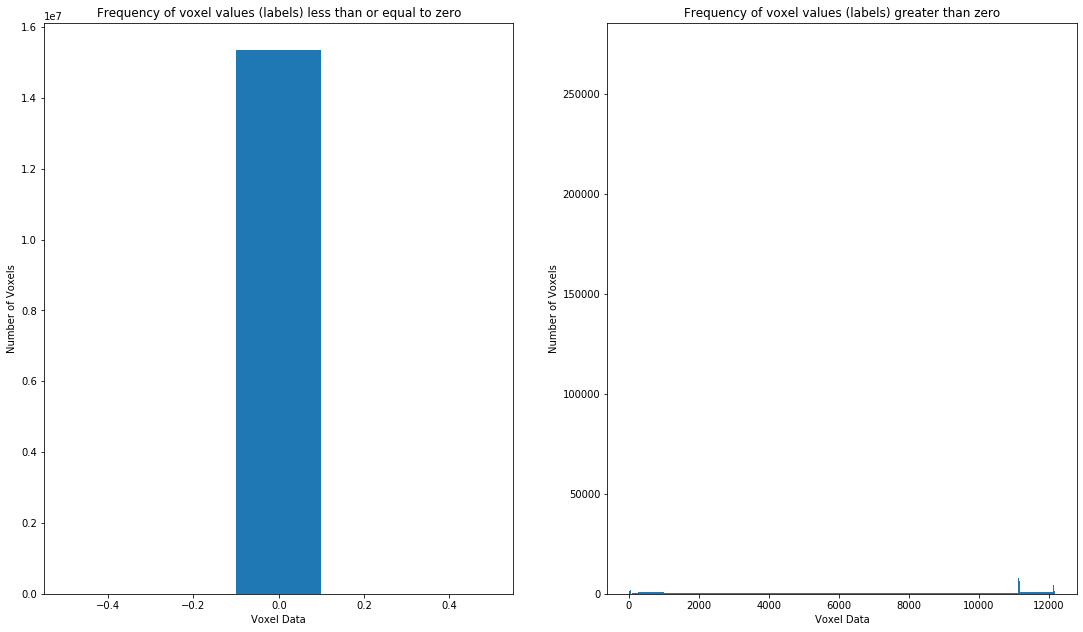

In [45]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
unwrappedData=np.ndarray.flatten(atlasData)


print('Total number of voxels')
voxTotal=atlasDataDimensions[0]*atlasDataDimensions[1]*atlasDataDimensions[2]
print(voxTotal)
print('')

print('Minimum voxel value')
minVal=np.min(unwrappedData)
print(minVal)
print('')

print('Maximum voxel value')
maxVal=np.max(unwrappedData)
print(maxVal)
print('')

splitPoint=0

def smallVal(n): 
    return n<=splitPoint
def largeVal(n):
    return n>splitPoint

result=map(smallVal,unwrappedData)
smallBool=list(result)

result=map(largeVal,unwrappedData)
largeBool=list(result)

print('Number of voxel values less than or equal to zero')
print(sum(smallBool))
print('')

print('Number of voxel values greater than zero')
print(sum(largeBool))
print('')

maxPlus=np.max(uniqueAtlasEntries)+1
#assumes a bit about bin behavior in matplotlib
histBins=np.append(uniqueAtlasEntries,maxPlus)

#unnecessary and uninformative to plot unlabeled voxels in histogram
#plt.subplot(1, 2, 1)
#plt.hist(unwrappedData[smallBool], bins=5)
#plt.xlabel('Voxel Data')
#plt.ylabel('Number of Voxels')
#plt.title('Frequency of voxel values (labels) less than or equal to zero')
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)

plt.subplot(1, 2, 2)
plt.hist(unwrappedData[largeBool], histBins)
plt.xlabel('Voxel Data')
plt.ylabel('Number of Voxels')
plt.title('Frequency of voxel values (labels) greater than zero')

In [38]:
from niwidgets import NiftiWidget
from niwidgets import examplet1

#pointing to a different nitfti, that doesn't have huge spaces between values, so that the colormap is discernable
atlasResortPath='/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-parcellation-volume.id-5c50c3f7ecd2f200ccfe9fae/parc.nii.gz'

atlas_widget = NiftiWidget(atlasResortPath)
atlas_widget.nifti_plotter()

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=90, continuous_update=False, description='x', max=181), IntSlider(value=…

Recommend nipy_spectral

As you explore the parcellation there are a number of things to take note of.  First and foremost we can note the means by which the parcellation actually parcellates the brain.  Note that the parcellation is, in essence, a volumetric mask which contains integer values corresponding to labels stored in a lookup table.  Each voxel is identified as corresponding to some component of an anatomical entity.  The anatomical entities that manifest in a parcellation vary depending on what standard is used, but typically they correspond to For example [PROVIDE EXAMPLE HERE].  




In [ ]:
print('T1 voxel resolution (in mm)')
print(atlasImg.header.get_zooms())
print('')


print('T1 voxel affine')
atlasImgAff=atlasImg.affine
print(atlasImg.affine)
print('')

print('Coordinates of posterior commisure')
imgSpatialTrans=np.abs([atlasImgAff[0,3]/atlasImgAff[0,0],imgAff[1,3]/atlasImgAff[1,1],atlasImgAff[2,3]/atlasImgAff[2,2]])
print(imgSpatialTrans)
print('')



[Introduct Anatomical T1 ]

In [ ]:
voxelDims

    Furthermore, because parcellations are performed on a specific subject's anatomy, the overlaying of one subject's parcellation on another subjects brain will result in an uninformative and innacruate characterization of the subject's brain.
    
DISPLAY MISMATCH HERE

    Next, we look at the tractogram in order to get a better sense of white matter's relation to tractography using the preceeding discussion as a basis for comparison.